# Linear Regression 

Linear Regression is a model that assumes a linear relationship between the one or more input variable (x) and output variable (y). 

The input variables are also known as independent variables while the output variable is called dependent variable. 

Simple Linear regression - If there is only one independent variable.

Multiple Linear regression - If there is more than one independent variable.


A Linear regression model is defined in terms of a linear function:

$\hat{y} = WX+ b$

The above is a simple linear regression model with one input.

$\hat{y}$ - prediction

$W$ - weights

$X$ - inputs

$b$ - bias term

Our goal is to predict the output $\hat{y}$ given the input $X$. The model will be a line of best fit that minimizes the distance between the predicted (model's output) and target (ground truth) values. Training data (X, y) is used to train the model and learn the weights W using gradient descent.

Most of the code is taken from : https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e check out this tutorial!!

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import torch.optim as optim

from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Generate data

Let’s generate some synthetic data for simple linear regression. 
We start with a vector of 100 data points for our feature X and create our labels using W = 3, b = 1 and some Gaussian noise.

In [3]:
NUM_SAMPLES = 100

# Set seed for reproducibility
torch.manual_seed(123)

In [4]:
# Generate synthetic data
def generate_data(num_samples):
    """Generate dummy data for linear regression."""
    X = torch.randn(num_samples, 1)
    random_noise = 0.1 * torch.randn(num_samples, 1)
    y = 3 * X + 1 + random_noise 
    return X, y

In [5]:
# Generate random (linear) data
X, y = generate_data(num_samples=NUM_SAMPLES)

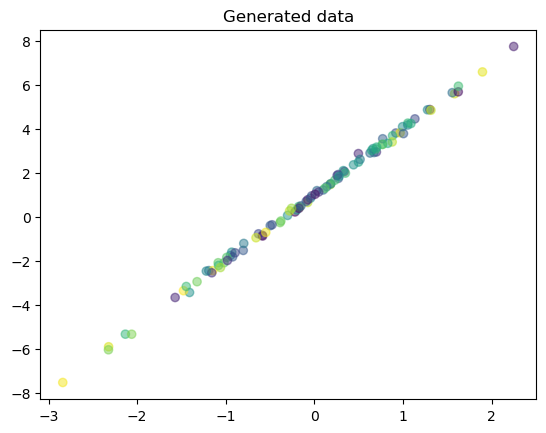

In [6]:
# Plots the X and y data points we created
plt.title("Generated data")
plt.scatter(X, y, c = torch.rand(NUM_SAMPLES), alpha=0.5)
plt.show()

 # TensorDataset
 
Dataset wrapping tensors.
(Each sample will be retrieved by indexing tensors along the first dimension.)

Since a dataset is just a couple of tensors, we can use PyTorch’s TensorDataset class, instead of using a custom dataset class.

In [7]:
dataset = TensorDataset(X, y)

# Split data


In [8]:
from torch.utils.data.dataset import random_split

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Splits randomly into train and validation datasets
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [9]:
# Builds a loader for each dataset to perform mini-batch gradient descent
train_loader = DataLoader(dataset=train_dataset, batch_size=4)
val_loader = DataLoader(dataset=val_dataset, batch_size=4)

# Define Linear Regression Model

* In PyTorch, a model is represented by a regular Python class that inherits from the `Module` class.
    * `Module` - Base class for all neural network modules.

* The `__init__` method lets the class initialize the modules parameters. We define two parameters, W and b, using the Parameter()
* The parameter (weights and bias) require computation of its gradients to update its value. For that we need to set `requires_grad=True`. 
* `forward(self, x)`: This is where the actual prediction happens. Here we define how our model is going to be run from input to output


In [10]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "a" and "b" real parameters of the model, we need to wrap them with nn.Parameter
        self.W = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x):
        # Computes the outputs / predictions
        return self.W * x + self.b

# Training step

In [11]:
def make_train_step(model, loss_fn, optimizer):
    '''
    Builds function that performs a step in the train loop
    '''
    def train_step(x, y):
        # Sets model to TRAIN mode
        model.train()
        
        # Makes predictions
        y_pred = model(x)
        
        # Computes loss
        loss = loss_fn(y, y_pred)
        
    
        # Computes gradients
        loss.backward()
        
    
        # Updates parameters and zeroes gradients
        optimizer.step()
        optimizer.zero_grad()
        
        # Returns the loss
        return loss.item()
    
    # Returns the function that will be called inside the train loop
    return train_step

# Train Linear Regression model

In [12]:
# Initialize model
model = LinearRegression()


# Sets hyper-parameters
lr = 1e-1
n_epochs = 100

# Defines loss function 
loss_fn = nn.MSELoss(reduction='mean')

# Defines optimizer
optimizer = optim.SGD(model.parameters(), lr=lr)

# Create empty loss lists to track values
losses = []
val_losses = []

# Creates function to perform train step from model, loss and optimizer
train_step = make_train_step(model, loss_fn, optimizer)

# Training loop
for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        loss = train_step(x_batch, y_batch)
        losses.append(loss)
        
    # Evaluation
    with torch.no_grad():
        for x_val, y_val in val_loader:
            model.eval()

            y_pred = model(x_val)
            val_loss = loss_fn(y_val, y_pred)
            val_losses.append(val_loss)
            
    if epoch%5==0:
        print (f"Epoch: {epoch} | Training loss: {np.mean(losses):.2f} | Validation loss: {np.mean(val_losses):.2f}")

print(model.state_dict())

Epoch: 0 | Training loss: 0.76 | Validation loss: 0.01
Epoch: 5 | Training loss: 0.14 | Validation loss: 0.01
Epoch: 10 | Training loss: 0.08 | Validation loss: 0.01
Epoch: 15 | Training loss: 0.06 | Validation loss: 0.01
Epoch: 20 | Training loss: 0.05 | Validation loss: 0.01
Epoch: 25 | Training loss: 0.04 | Validation loss: 0.01
Epoch: 30 | Training loss: 0.04 | Validation loss: 0.01
Epoch: 35 | Training loss: 0.03 | Validation loss: 0.01
Epoch: 40 | Training loss: 0.03 | Validation loss: 0.01
Epoch: 45 | Training loss: 0.03 | Validation loss: 0.01
Epoch: 50 | Training loss: 0.03 | Validation loss: 0.01
Epoch: 55 | Training loss: 0.03 | Validation loss: 0.01
Epoch: 60 | Training loss: 0.02 | Validation loss: 0.01
Epoch: 65 | Training loss: 0.02 | Validation loss: 0.01
Epoch: 70 | Training loss: 0.02 | Validation loss: 0.01
Epoch: 75 | Training loss: 0.02 | Validation loss: 0.01
Epoch: 80 | Training loss: 0.02 | Validation loss: 0.01
Epoch: 85 | Training loss: 0.02 | Validation loss: